# WDSA-CCWI 2022
# <font color='blue'> TSNet Short Tutorial

## Example 1: TNet1 - getting started

We start with using a simple network model, TSNet1, to demonstrate how to:

- Import tsnet
- Generate a transient model
- Set wave speed
- Set time step and simulation period
- Perform initial condition calculation
- Create transient event
- Run transient simulation and save results to .obj file
- Plot simulation results

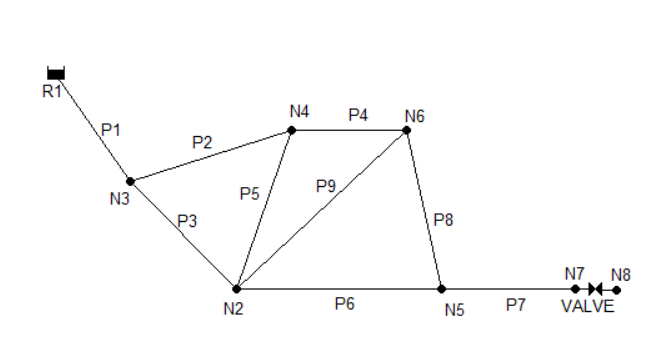

### Import the tsnet package:

In [1]:
import tsnet
import matplotlib.pyplot as plt

### Create the model, define settings, and execute simuation
We will generate a trasient event by rapidly closing the valve (1 sec closure)

In [2]:
# inp source file
#-------------------------------------------------
inp_file = 'Tnet1.inp'

# Open an example network and create a transient model
#-------------------------------------------------
tm = tsnet.network.TransientModel('networks/' + inp_file)

# Set wavespeed
#-------------------------------------------------
tm.set_wavespeed(1200.) # m/s

# Set time options
#-------------------------------------------------
tf = 20   # simulation period [s]
tm.set_time(tf)

# Set valve closure
#-------------------------------------------------
ts = 5 # valve closure start time [s]
tc = 1 # valve closure period [s]
se = 0 # end open percentage [s]
m = 2 # closure constant [dimensionless]
tm.valve_closure('VALVE',[tc,ts,se,m])

# Initialize steady state simulation
t0 = 0
tm = tsnet.simulation.Initializer(tm,t0)

# Transient simulation
#-------------------------------------------------
tm = tsnet.simulation.MOCSimulator(tm)

Simulation time step 0.23194 s
Total Time Step in this simulation 86
Estimated simulation time 0:00:00.171570
Transient simulation completed 9 %...
Transient simulation completed 18 %...
Transient simulation completed 27 %...
Transient simulation completed 37 %...
Transient simulation completed 46 %...
Transient simulation completed 55 %...
Transient simulation completed 65 %...
Transient simulation completed 74 %...
Transient simulation completed 83 %...
Transient simulation completed 93 %...


### Get results

- Plot head at nodes N2, N3, N5, N7

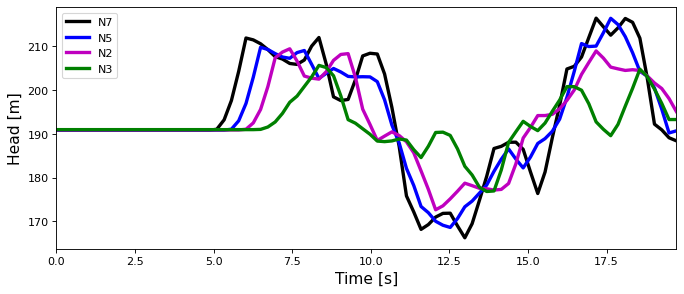

In [3]:
# import matplotlib.pyplot as plt

# Plot head at nodes
#-------------------------------------------------
node = 'N7'
node = tm.get_node(node)
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='w')
plt.plot(tm.simulation_timestamps,node.head, 'k', lw=3, label = 'N7')
node = 'N5'
node = tm.get_node(node)
plt.plot(tm.simulation_timestamps,node.head, 'b', lw=3, label = 'N5')
node = 'N2'
node = tm.get_node(node)
plt.plot(tm.simulation_timestamps,node.head, 'm', lw=3, label = 'N2')
node = 'N3'
node = tm.get_node(node)
plt.plot(tm.simulation_timestamps,node.head, 'g', lw=3, label = 'N3')
plt.xlim([tm.simulation_timestamps[0],tm.simulation_timestamps[-1]])
#plt.title('Pressure Head at Node %s '%node)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Head [m]", fontsize=14)
plt.legend(loc='best')

- We can also plot using a much simpler way

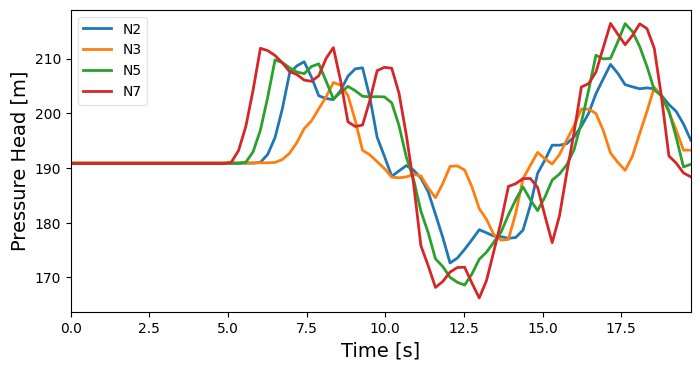

In [5]:
tm.plot_node_head(['N2', 'N3', 'N5', 'N7'])

- Plot the velocities at a selected pipe at the start and end 

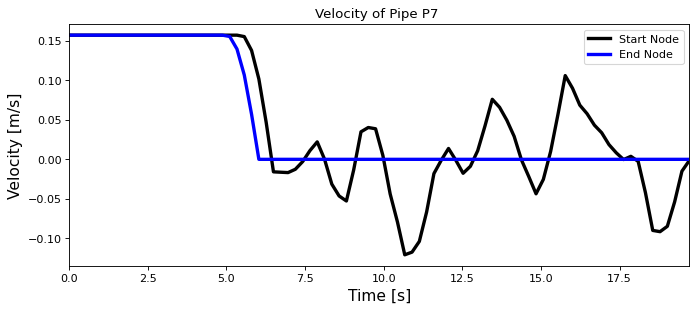

In [6]:
# Plot velocity
#-------------------------------------------------
pipe = 'P7'
pipe = tm.get_link(pipe)

fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='w')
plt.plot(tm.simulation_timestamps,pipe.start_node_velocity,'k', lw=3, label='Start Node')
plt.plot(tm.simulation_timestamps,pipe.end_node_velocity, 'b', lw=3, label='End Node')
plt.xlim([tm.simulation_timestamps[0],tm.simulation_timestamps[-1]])
plt.title('Velocity of Pipe %s '%pipe)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Velocity [m/s]", fontsize=14)
plt.legend(loc='best')

## 1.1 Test with slower valve closure
We will generate a trasient event by slowly closing the valve (3 sec closure)

Simulation time step 0.23194 s
Total Time Step in this simulation 86
Estimated simulation time 0:00:00.171484
Transient simulation completed 9 %...
Transient simulation completed 18 %...
Transient simulation completed 27 %...
Transient simulation completed 37 %...
Transient simulation completed 46 %...
Transient simulation completed 55 %...
Transient simulation completed 65 %...
Transient simulation completed 74 %...
Transient simulation completed 83 %...
Transient simulation completed 93 %...


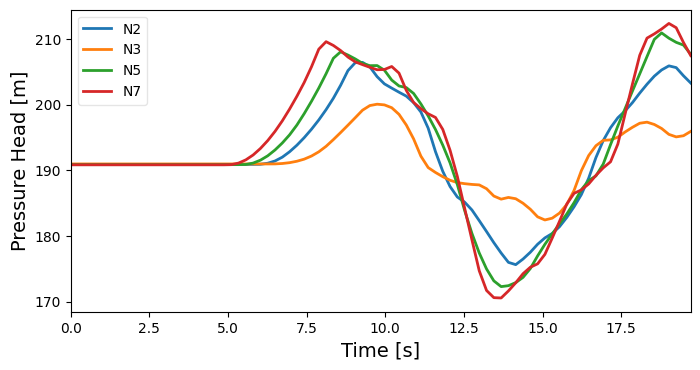

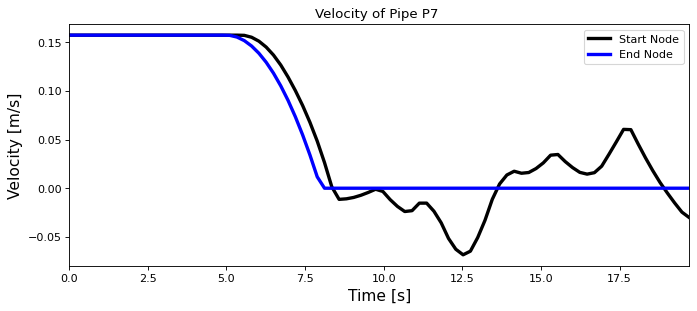

In [7]:
#%% Slower valve closure
#-------------------------------------------------
# Open an example network and create a transient model
#-------------------------------------------------
tm1 = tsnet.network.TransientModel('networks/' + inp_file)

# Set wavespeed
#-------------------------------------------------
tm1.set_wavespeed(1200.) # m/s

# Set time options
#-------------------------------------------------
tf = 20   # simulation period [s]
tm1.set_time(tf)
ts = 5 # valve closure start time [s]
tc = 3 # valve closure period [s]
se = 0 # end open percentage [s]
m = 2 # closure constant [dimensionless]
tm1.valve_closure('VALVE',[tc,ts,se,m])

# Initialize steady state simulation
t0=0
tm1 = tsnet.simulation.Initializer(tm1,t0)

# Transient simulation
#-------------------------------------------------
tm1 = tsnet.simulation.MOCSimulator(tm1)

# Plot head at nodes
#-------------------------------------------------

tm1.plot_node_head(['N2', 'N3', 'N5', 'N7'])

# node = 'N7'
# node = tm1.get_node(node)
# fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='w')
# plt.plot(tm1.simulation_timestamps,node.head, 'k', lw=3, label = 'N7')
# node = 'N5'
# node = tm1.get_node(node)
# plt.plot(tm1.simulation_timestamps,node.head, 'b', lw=3, label = 'N5')
# node = 'N2'
# node = tm1.get_node(node)
# plt.plot(tm1.simulation_timestamps,node.head, 'm', lw=3, label = 'N2')
# node = 'N3'
# node = tm1.get_node(node)
# plt.plot(tm1.simulation_timestamps,node.head, 'g', lw=3, label = 'N3')
# plt.xlim([tm1.simulation_timestamps[0],tm1.simulation_timestamps[-1]])
# #plt.title('Head at Node %s '%node)
# plt.xlabel("Time [s]", fontsize=14)
# plt.ylabel("Head [m]", fontsize=14)
# plt.legend(loc='best')

# Plot velocity
#-------------------------------------------------
pipe = 'P7'
pipe = tm1.get_link(pipe)
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='w')
plt.plot(tm1.simulation_timestamps,pipe.start_node_velocity,'k', lw=3, label='Start Node')
plt.plot(tm1.simulation_timestamps,pipe.end_node_velocity, 'b', lw=3, label='End Node')
plt.xlim([tm1.simulation_timestamps[0],tm1.simulation_timestamps[-1]])
plt.title('Velocity of Pipe %s '%pipe)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Velocity [m/s]", fontsize=14)
plt.legend(loc='best')